In [56]:
# let's try using linear regression to predict the label using the irregularity score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create a gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create a support vector classifier
from sklearn.svm import SVC

# Create a Bayesian optimization
from bayes_opt import BayesianOptimization

# visualize using pairplot
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# load the results
pan_tompkins_results = pd.read_csv('results/pan_tomkins_features.csv')
pan_tompkins_results = pan_tompkins_results.dropna().drop('record_name', axis=1)
print('results shape:', pan_tompkins_results.shape)

results shape: (8525, 13)


In [54]:
labels = pan_tompkins_results['label']
print(labels.value_counts())

label
N    5050
O    2453
A     738
~     284
Name: count, dtype: int64


In [55]:
# Let's apply some balancing techniques to the data
# Apply
from sklearn.utils import resample
# balance the data
pan_tompkins_results = resample(pan_tompkins_results, replace=True, n_samples=1000, random_state=42)
print(pan_tompkins_results['label'].value_counts())


label
N    607
O    278
A     77
~     38
Name: count, dtype: int64


In [ ]:
#resampling methods
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek

resampling_methods = {
    'No Resampling': None,
    'Random Undersampling': RandomUnderSampler(random_state=143),
    'Random Oversampling': RandomOverSampler(random_state=143),
    'SMOTE': SMOTE(random_state=143),
    'ADASYN': ADASYN(random_state=143),
    'Tomek Links': TomekLinks(),
    'SMOTE + Tomek': SMOTETomek(random_state=143)
}

In [20]:
from sklearn.preprocessing import StandardScaler

# remove nan values
pan_tompkins_results = pan_tompkins_results.dropna()

# scale all the features
# scaler = StandardScaler()
# pan_tompkins_results[['rr_std', 'hr_std', 'signal_power', 'signal_entropy']] = scaler.fit_transform(pan_tompkins_results[['rr_std', 'hr_std', 'signal_power', 'signal_entropy']])

# split the data into train and test
X, y = pan_tompkins_results.drop('label', axis=1), pan_tompkins_results['label']

feature_names = X.columns

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# lets print the columns
display(X_train[:5])


array([[ 1.0141272 ,  1.28490631,  0.98579802, -0.56771886,  1.28096319,
        -0.77246442,  0.59011156,  0.22806462, -0.69693472,  1.0141272 ,
         1.28490631,  1.52886901],
       [ 0.44887651, -0.59652087,  0.30587778, -0.65478954, -0.95471338,
        -0.19566035, -0.98616307, -0.44948879, -0.07544505,  0.44887651,
        -0.59652087, -1.00405541],
       [-0.94092987, -0.29928742, -0.81080925,  0.78900895, -0.16021936,
         0.65491825,  0.0996648 , -0.23014438,  0.24238154, -0.94092987,
        -0.29928742, -0.3555653 ],
       [-0.29252454, -0.27112947, -0.28482734,  0.01141529, -0.06339534,
         0.18160049,  0.03961524, -0.43095369,  0.12020448, -0.29252454,
        -0.27112947, -0.41624036],
       [ 0.37309715, -0.17879863,  0.25903186, -0.55059273,  0.2003211 ,
        -0.31014145,  0.39949266, -0.18018343,  0.1116079 ,  0.37309715,
        -0.17879863, -0.36479808]])

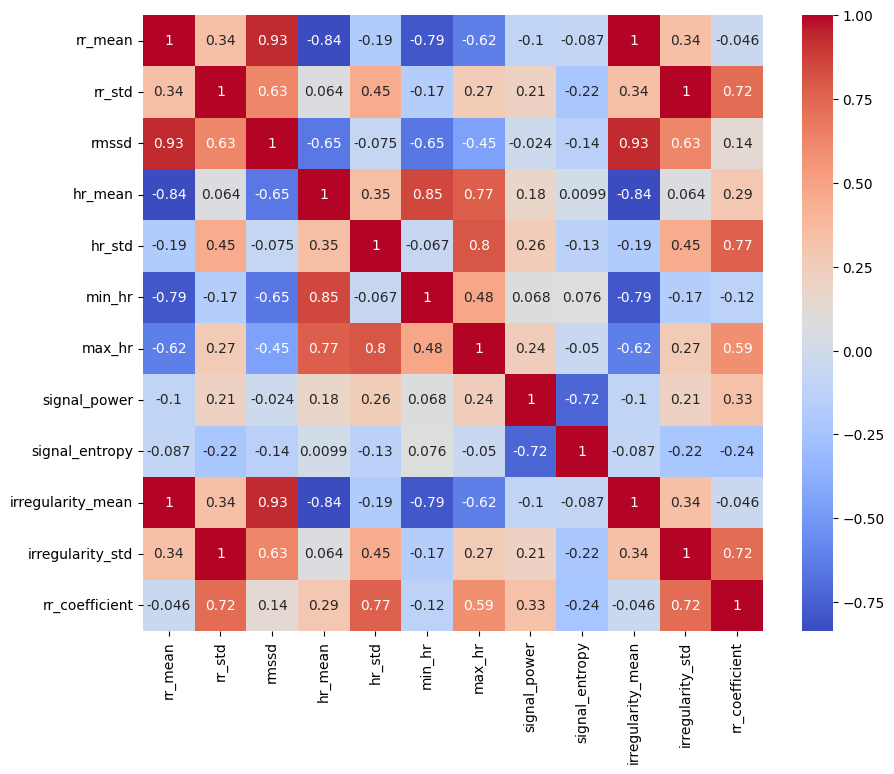

In [21]:
# plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pan_tompkins_results.drop(columns=['label']).corr(), annot=True, cmap='coolwarm')
plt.show()

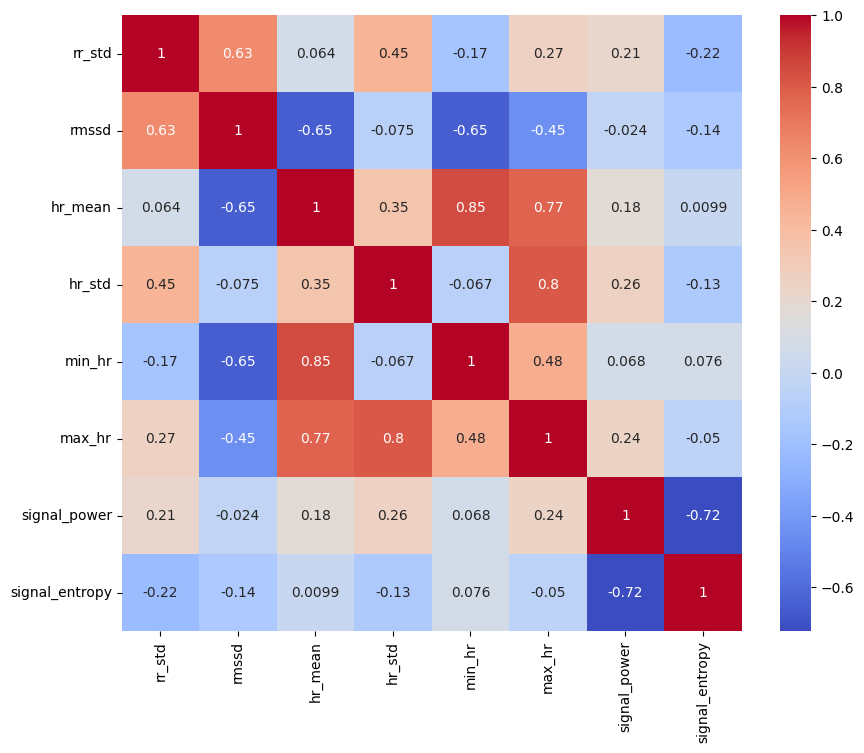

In [22]:
# remove highly correlated features
pan_tompkins_results = pan_tompkins_results.drop(columns=['irregularity_mean', 'irregularity_std', 'rr_coefficient', 'rr_mean'])
plt.figure(figsize=(10, 8))
sns.heatmap(pan_tompkins_results.drop(columns=['label']).corr(), annot=True, cmap='coolwarm')
plt.show()

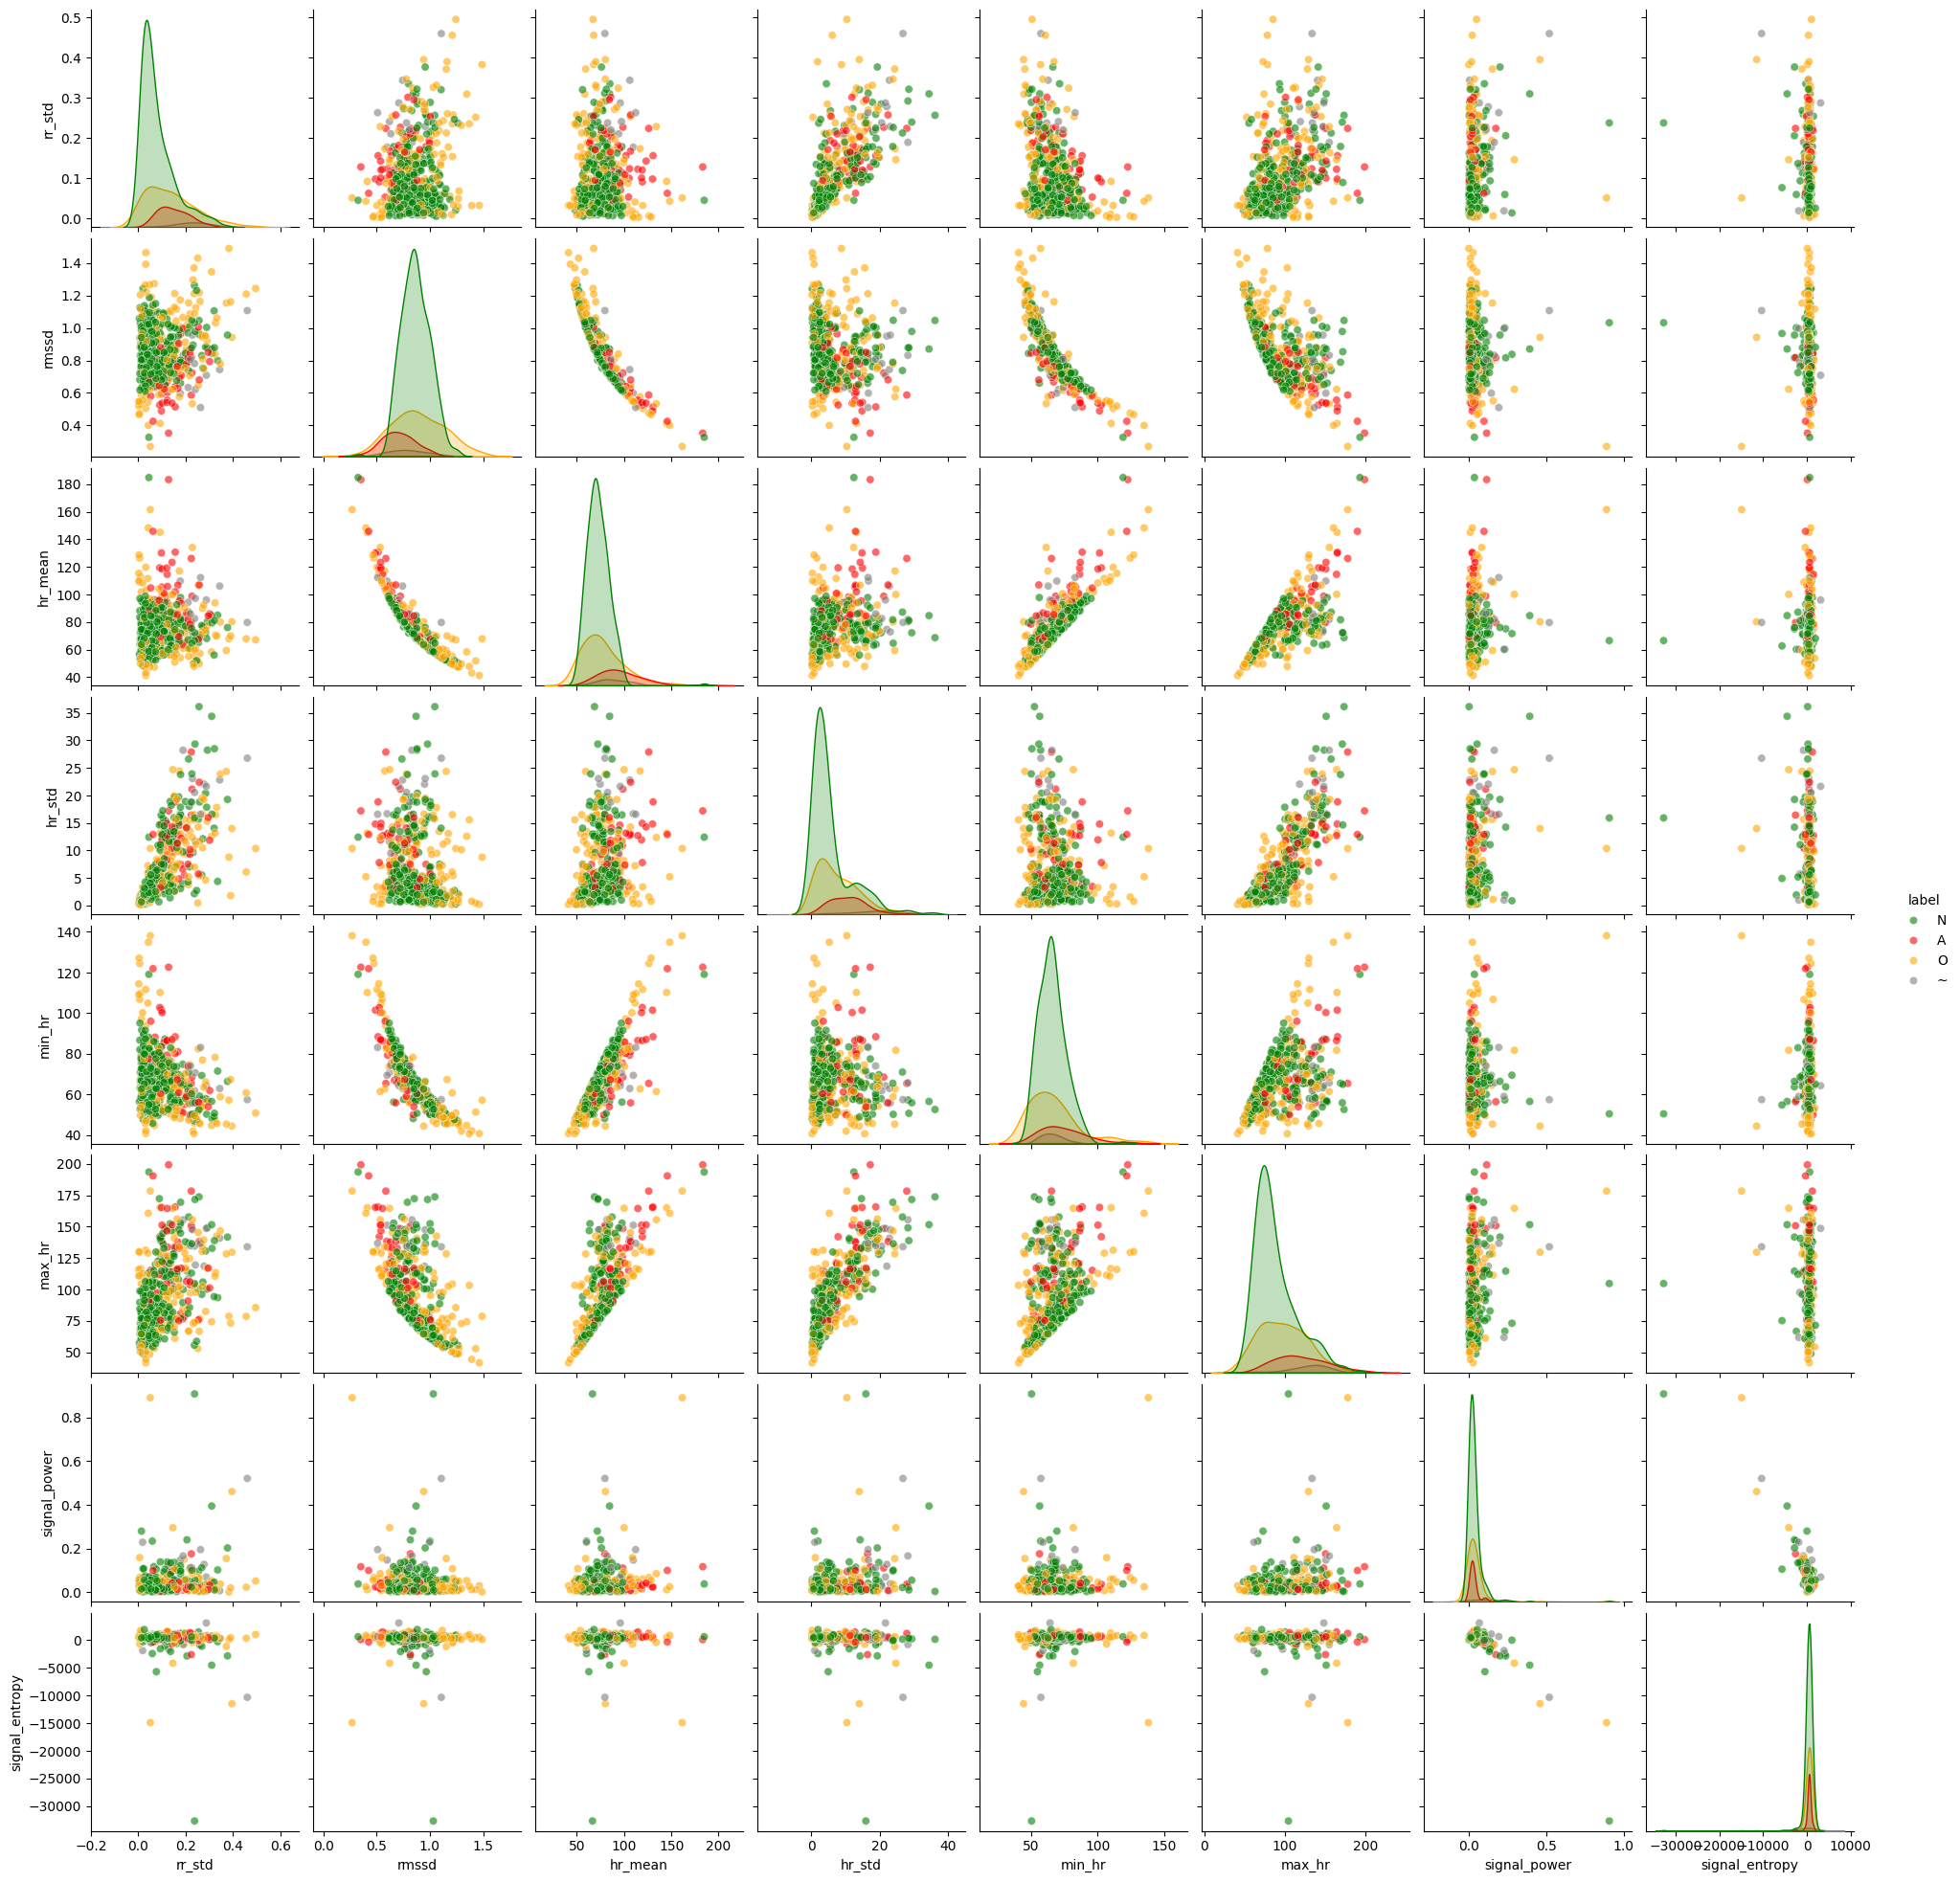

In [48]:
sns.pairplot(pan_tompkins_results[:500], hue='label', diag_kind='kde', \
             palette={'N': 'green', 'O': 'orange', 'A': 'red',  '~': 'gray'}, \
             # palette={'N': 'green', 'S': 'orange', 'V': 'yellow', 'F': 'red', 'Q': 'purple'},              
             plot_kws={'alpha': 0.6})
plt.show()

In [24]:
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Runtime', 'Top Predictor' ])
start_time = time.time()
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_train_score = accuracy_score(y_train, lr.predict(X_train))
lr_test_score = accuracy_score(y_test, lr.predict(X_test))
lr_runtime = time.time() - start_time
top_predictor = [feature_names[np.argmax(np.abs(lr.coef_[0]))]]
result = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Score': [lr_train_score],
    'Test Score': [lr_test_score],
    'Runtime': [lr_runtime],
    'Top Predictor': [top_predictor]
})
print(result)
result = pd.concat([result], ignore_index=True)


                 Model  Train Score  Test Score   Runtime Top Predictor
0  Logistic Regression     0.713636    0.700293  0.071569       [rmssd]


/opt/miniconda3/envs/afib/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
start_time = time.time()
# Create a logistic regression model L2
logreg2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
# Fit the model
logreg2.fit(X_train, y_train)
# Predict the target variable
y_pred2 = logreg2.predict(X_test)
# Calculate the accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
# Calculate the runtime
runtime2 = time.time() - start_time
# Get the top predictor
# Append the results
result2 = pd.DataFrame({
    'Model': ['Logistic Regression L2'],
    'Train Accuracy': [logreg2.score(X_train, y_train)],
    'Test Accuracy': [accuracy2],
    'Runtime': [runtime2],
})
print(result2)
results = pd.concat([results, result2], ignore_index=True)

                    Model  Train Accuracy  Test Accuracy   Runtime
0  Logistic Regression L2        0.697361       0.686217  0.059106


/var/folders/3v/t7p60tvs5773q0xm_4_bb2tr0000gn/T/ipykernel_77155/3180948485.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result2], ignore_index=True)


In [26]:
from sklearn.calibration import LinearSVC


start_time = time.time()
# Create a linear SVM model
svm = LinearSVC(random_state=42)
# Fit the model
svm.fit(X_train, y_train)
# Predict the target variable
y_pred_svm = svm.predict(X_test)
# Calculate the accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Calculate the runtime
runtime_svm = time.time() - start_time

# Append the results
result_svm = pd.DataFrame({
    'Model': ['Linear SVM'],
    'Train Accuracy': [svm.score(X_train, y_train)],
    'Test Accuracy': [accuracy_svm],
    'Runtime': [runtime_svm],
})
print(result_svm)
results = pd.concat([results, result_svm], ignore_index=True)

        Model  Train Accuracy  Test Accuracy   Runtime
0  Linear SVM        0.693402       0.686217  0.062176


In [27]:
# Create a random forest model
rf = RandomForestClassifier(random_state=42)
# Fit the model
rf.fit(X_train, y_train)
# Predict the target variable
y_pred_rf = rf.predict(X_test)
# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculate the runtime
runtime_rf = time.time() - start_time
# Get the top predictor
top_predictor_rf = feature_names[np.argmax(rf.feature_importances_)]
# Append the results
result_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Accuracy': [rf.score(X_train, y_train)],
    'Test Accuracy': [accuracy_rf],
    'Runtime': [runtime_rf],
    'Top Predictor': [top_predictor_rf]
})
print(result_rf)
results = pd.concat([results, result_rf], ignore_index=True)

           Model  Train Accuracy  Test Accuracy   Runtime   Top Predictor
0  Random Forest             1.0       0.723167  3.452339  rr_coefficient


In [28]:
# Create a gradient boosting model
gb = GradientBoostingClassifier(random_state=42)
# Fit the model
gb.fit(X_train, y_train)
# Predict the target variable
y_pred_gb = gb.predict(X_test)
# Calculate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
# Calculate the runtime
runtime_gb = time.time() - start_time
# Get the top predictor
top_predictor_gb = feature_names[np.argmax(gb.feature_importances_)]
# Append the results
result_gb = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'Train Accuracy': [gb.score(X_train, y_train)],
    'Test Accuracy': [accuracy_gb],
    'Runtime': [runtime_gb],
    'Top Predictor': [top_predictor_gb]
})
print(result_gb)
results = pd.concat([results, result_gb], ignore_index=True)

               Model  Train Accuracy  Test Accuracy    Runtime   Top Predictor
0  Gradient Boosting        0.795161       0.706158  18.551966  rr_coefficient


In [29]:
# Display all the results as a table
display(results)

,Model,Train Accuracy,Test Accuracy,Runtime,Top Predictor
0,Logistic Regression L2,0.697361,0.686217,0.059106,NaN
1,Linear SVM,0.693402,0.686217,0.062176,NaN
2,Random Forest,1.000000,0.723167,3.452339,rr_coefficient
3,Gradient Boosting,0.795161,0.706158,18.551966,rr_coefficient


### Let's do some parameter  hypertuning

In [30]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

ft_results = pd.DataFrame(columns=['Model', 'Hyperparameter', 'Train Accuracy', 'Test Accuracy', 'Runtime'])# # A4-1 Find the best hyperparameters for the 3 models

In [31]:
start_time = time.time()
# Function to optimize Logistic Regression L2
def optimize_logreg_l2(C):
    # Create a logistic regression model L2
    logreg = LogisticRegression(penalty='l2', solver='liblinear', C=C, random_state=42)
    # Fit the model
    logreg.fit(X_train, y_train)
    # Predict the target variable
    y_pred = logreg.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate the runtime
    runtime = time.time() - start_time
    return accuracy

# Create a BayesianOptimization object

def find_hyperparameter_logreg(X_train, y_train, X_test, y_test): 
    logreg_bo = BayesianOptimization(
        optimize_logreg_l2,
        {'C': (0.001, 10)}
    )

    # Perform the optimization
    logreg_bo.maximize()

    # Get the best hyperparameters
    params = logreg_bo.max['params']
    C = params['C']
    # Create a logistic regression model L2
    logreg = LogisticRegression(penalty='l2', solver='liblinear', C=C, random_state=42)
    # Fit the model
    logreg.fit(X_train, y_train)
    # Predict the target variable
    y_pred = logreg.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate the runtime
    runtime = time.time() - start_time
    # Append the results
    result = pd.DataFrame({
        'Model': ['Logistic Regression L2'],
        'Hyperparameter': [f'C={C}'],
        'Train Accuracy': [logreg.score(X_train, y_train)],
        'Test Accuracy': [accuracy],
        'Runtime': [runtime]
    })

    return result


result = find_hyperparameter_logreg(X_train, y_train, X_test, y_test)
print(result)
ft_results = pd.concat([result], ignore_index=True)

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.6903    | 3.964     |
| 2         | 0.6891    | 3.401     |
| 3         | 0.6915    | 7.385     |
| 4         | 0.6886    | 1.679     |
| 5         | 0.6915    | 5.15      |
| 6         | 0.6933    | 9.49      |
| 7         | 0.6933    | 10.0      |
| 8         | 0.6927    | 8.761     |
| 9         | 0.6933    | 9.755     |
| 10        | 0.6933    | 9.607     |
| 11        | 0.6933    | 9.898     |
| 12        | 0.6933    | 9.396     |
| 13        | 0.6446    | 0.003289  |
| 14        | 0.6915    | 6.282     |
| 15        | 0.6891    | 2.374     |
| 16        | 0.6921    | 8.059     |
| 17        | 0.6915    | 5.713     |
| 18        | 0.6927    | 9.101     |
| 19        | 0.6915    | 6.84      |
| 20        | 0.6909    | 4.595     |
| 21        | 0.6921    | 8.436     |
| 22        | 0.6933    | 9.683     |
| 23        | 0.6933    | 9.827     |
| 24        | 0.6933    | 9.447     |
| 25        

In [32]:
start_time=time.time()

# Find the best hyperparameters for random forest
def optimize_random_forest(n_estimators, max_depth):
    model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))

def find_hyperparameter_rf(X_train, y_train, X_test, y_test):
    pbounds = {'n_estimators': (10, 200), 
               'max_depth': (1, 10)}
    optimizer = BayesianOptimization(
        f=optimize_random_forest,
        pbounds=pbounds,
        random_state=1,
    )
    optimizer.maximize()

    best_params = optimizer.max['params']
    best_params['n_estimators'] = int(best_params['n_estimators'])
    best_params['max_depth'] = int(best_params['max_depth'])
    print(best_params)

    result = {
        'algorithm': 'Random Forest',
        'accuracy': optimizer.max['target'],
        'hyperparameters': best_params
    }

    rf = RandomForestClassifier(**best_params, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    train_accuracy = rf.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    runtime = time.time() - start_time
    result = pd.DataFrame({
        'Model': ['Random Forest'],
        'Hyperparameter': [best_params],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Runtime': [runtime]
    })

    # Now we print the top predictors
    top_predictors = [feature_names[i] for i in np.argsort(rf.feature_importances_)[::-1]]
    print("Top predictors:", top_predictors)

    return result

result = find_hyperparameter_rf(X_train, y_train, X_test, y_test)
ft_results = pd.concat([ft_results, result], ignore_index=True)
print(result)


|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.7056    | 4.753     | 146.9     |
| 2         | 0.6062    | 1.001     | 67.44     |
| 3         | 0.651     | 2.321     | 27.54     |
| 4         | 0.6551    | 2.676     | 75.66     |
| 5         | 0.7044    | 4.571     | 112.4     |
| 6         | 0.7045    | 4.857     | 145.6     |
| 7         | 0.7255    | 8.448     | 97.19     |
| 8         | 0.7287    | 9.854     | 177.6     |
| 9         | 0.6063    | 1.232     | 200.0     |
| 10        | 0.6063    | 1.118     | 167.0     |
| 11        | 0.6081    | 1.339     | 101.8     |
| 12        | 0.7301    | 9.964     | 92.87     |
| 13        | 0.7292    | 9.485     | 184.0     |
| 14        | 0.6529    | 2.789     | 182.0     |
| 15        | 0.7053    | 4.343     | 89.24     |
| 16        | 0.727     | 8.509     | 120.2     |
| 17        | 0.6081    | 1.064     | 122.4     |
| 18        | 0.7299    | 9.953     | 114.5     |


In [58]:
# Find the best hyperparameters for Linear SVM

def optimize_linear_svm(C):
    model = SVC(C=C, kernel='linear', random_state=42)
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))

def find_hyperparameter_svm(X_train, y_train, X_test, y_test):
    pbounds = {'C': (0.001, 10)}
    optimizer = BayesianOptimization(
        f=optimize_linear_svm,
        pbounds=pbounds,
        random_state=1,
    )
    optimizer.maximize()

    best_params = optimizer.max['params']
    best_params['C'] = float(best_params['C'])
    print(best_params)

    result = {
        'algorithm': 'Linear SVM',
        'accuracy': optimizer.max['target'],
        'hyperparameters': best_params
    }

    svm = SVC(**best_params, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    train_accuracy = svm.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    runtime = time.time() - start_time
    result = pd.DataFrame({
        'Model': ['Linear SVM'],
        'Hyperparameter': [best_params],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Runtime': [runtime]
    })

    return result

result = find_hyperparameter_svm(X_train, y_train, X_test, y_test)
print(result)
ft_results = pd.concat([ft_results, result], ignore_index=True)


|   iter    |  target   |     C     |
-------------------------------------


In [33]:
# Find the best hyperparameters for gradient boosting
start_time = time.time()

def optimize_gradient_boosting(n_estimators, max_depth, learning_rate):
    model = GradientBoostingClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), learning_rate=learning_rate, random_state=42)
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))


def find_hyperparameter_gb(X_train, y_train, X_test, y_test):
    
    pbounds = {'n_estimators': (10, 100), 'max_depth': (1, 10), 'learning_rate': (0.01, 0.1)}
    optimizer = BayesianOptimization(
        f=optimize_gradient_boosting,
        pbounds=pbounds,
        random_state=1,
    )

    optimizer.maximize()

    best_params = optimizer.max['params']
    best_params['n_estimators'] = int(best_params['n_estimators'])
    best_params['max_depth'] = int(best_params['max_depth'])
    print(best_params)

    result = {
        'algorithm': 'Gradient Boosting',
        'accuracy': optimizer.max['target'],
        'hyperparameters': best_params
    }

    gb = GradientBoostingClassifier(**best_params, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    train_accuracy = gb.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    runtime = time.time() - start_time
    result = pd.DataFrame({
        'Model': ['Gradient Boosting'],
        'Hyperparameter': [best_params],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Runtime': [runtime]
    })

    # Now we can get the top predictors
    top_predictors = [feature_names[i] for i in np.argsort(gb.feature_importances_)[::-1]]
    print("Top predictors:", top_predictors)

    return result

result = find_hyperparameter_gb(X_train, y_train, X_test, y_test)
print(result)
ft_results = pd.concat([ft_results, result], ignore_index=True)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 0.6934    | 0.04753   | 7.483     | 10.01     |
| 2         | 0.6585    | 0.03721   | 2.321     | 18.31     |
| 3         | 0.7145    | 0.02676   | 4.11      | 45.71     |
| 4         | 0.7309    | 0.05849   | 4.773     | 71.67     |
| 5         | 0.6556    | 0.0284    | 8.903     | 12.46     |
| 6         | 0.7323    | 0.0871    | 4.767     | 71.51     |
| 7         | 0.7318    | 0.06112   | 7.917     | 67.96     |
| 8         | 0.6566    | 0.02949   | 1.643     | 65.99     |
| 9         | 0.7271    | 0.08259   | 9.017     | 71.39     |
| 10        | 0.7273    | 0.06468   | 9.822     | 42.62     |
| 11        | 0.7232    | 0.03367   | 6.006     | 39.03     |
| 12        | 0.7248    | 0.06095   | 9.982     | 35.54     |
| 13        | 0.7277    | 0.09816   | 4.568     | 32.51     |
| 14        | 0.6943    | 0.01724   | 9.726     | 29.35     |
| 15    

In [34]:
pd.set_option('display.max_colwidth', None)  
display(ft_results)

,Model,Hyperparameter,Train Accuracy,Test Accuracy,Runtime
0,Logistic Regression L2,C=9.490088302295732,0.704839,0.693255,4.480297
1,Random Forest,"{'max_depth': 9, 'n_estimators': 92}",0.808358,0.709091,87.858472
2,Gradient Boosting,"{'learning_rate': 0.07093711740808743, 'max_depth': 6, 'n_estimators': 52}",0.872141,0.716129,1066.263830


In [44]:
from sklearn.metrics import confusion_matrix

# Lets print the confusion matrix using the gradient boosting model
best_gb = ft_results.iloc[2]
gb = GradientBoostingClassifier(**best_gb['Hyperparameter'], random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# add the labels to the confusion matrix
conf_matrix = pd.DataFrame(conf_matrix, index=['A', 'N', 'O', '~'], columns=['A', 'N', 'O', '~'])
display(conf_matrix)

,A,N,O,~
A,53,39,60,8
N,5,919,69,10
O,17,236,226,11
~,0,13,16,23


In [43]:

# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           A       0.71      0.33      0.45       160
           N       0.76      0.92      0.83      1003
           O       0.61      0.46      0.52       490
           ~       0.44      0.44      0.44        52

    accuracy                           0.72      1705
   macro avg       0.63      0.54      0.56      1705
weighted avg       0.70      0.72      0.70      1705



In [46]:
# let's remove the ~ label from the train and test data
X_train_2 = X_train[y_train != '~']
y_train_2 = y_train[y_train != '~']
X_test_2 = X_test[y_test != '~']
y_test_2 = y_test[y_test != '~']

# now let's train the model again
gb_2 = GradientBoostingClassifier(**best_gb['Hyperparameter'], random_state=42)
gb_2.fit(X_train_2, y_train_2)
y_pred_2 = gb_2.predict(X_test_2)
conf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)
# add the labels to the confusion matrix
conf_matrix_2 = pd.DataFrame(conf_matrix_2, index=['A', 'N', 'O'], columns=['A', 'N', 'O'])
display(conf_matrix_2)

,A,N,O
A,52,45,63
N,4,927,72
O,21,228,241


In [48]:
# print the classification report
print('Accuracy:', accuracy_score(y_test_2, y_pred_2))
print(classification_report(y_test_2, y_pred_2))


Accuracy: 0.7380520266182699
              precision    recall  f1-score   support

           A       0.68      0.33      0.44       160
           N       0.77      0.92      0.84      1003
           O       0.64      0.49      0.56       490

    accuracy                           0.74      1653
   macro avg       0.70      0.58      0.61      1653
weighted avg       0.72      0.74      0.72      1653



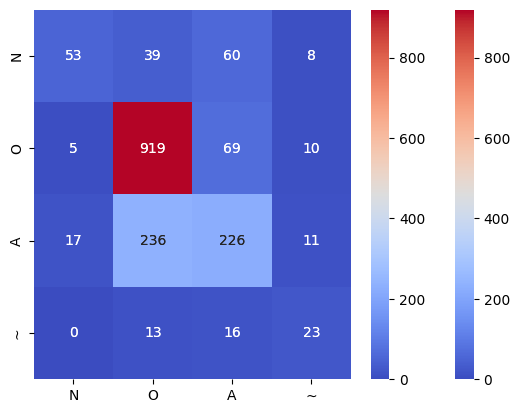

In [41]:
# visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
# add the labels to the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', xticklabels=['N', 'O', 'A', '~'], yticklabels=['N', 'O', 'A', '~'])
plt.show()
